# Objective

Plot hexagonal packing efficiency vs. square packing efficiency.

Color markers by:
- amphora period
- amphora content
- amphora volume

# Observations

- There are currently more jars (6 out of 10) where square packing is more efficient than hexagonal packing.
- Of the 4 jars where hexagonal packing is more efficient, there are 2 jars where square and hexagonal packing are pretty much equally efficient.
- There are currently no obvious clusters by period, content, and volume. That said, there are only 10 jars in the dataset. We are bound to see more soon.

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

## Load data

In [65]:
df = pd.read_csv('Amphora Stacking 20210816.csv')

In [66]:
df

,Amphora Type,Period,Region,Content,Amphora Vol. [L],Sq. Unit Width [m],Sq. Unit Height [m],Sq. Unit Volume [m^3],Sq. Pack. Eff. (Auto),Hex. Unit Side Length [m],Hex. Unit Height [m],Hex. Pack. Unit Volume [m^3],Hex. Pack. Eff. (Auto)
0,Africana 1 Piccolo,Middle,Central,Oil,42.500000,0.29552,1.76435,0.154084,0.551646,0.29666,1.79343,0.410067,0.621850
1,Africana 2A Grande,Middle,Central,Wine,77.900000,0.44700,1.20000,0.239771,0.649787,0.44700,1.42800,0.741302,0.630512
2,Almagro 50,"Middle, Late",West,Fish sauce,18.870000,0.21400,1.58000,0.072358,0.521576,0.21400,1.68200,0.200127,0.565741
3,Almagro 51A-B,"Middle, Late",West,Fish sauce,16.581294,0.23900,1.03500,0.059120,0.560935,0.23900,1.18900,0.176453,0.563820
4,Cretoise 1,Early,East,Wine,22.775000,0.27600,0.98900,0.075338,0.604608,0.27600,1.13800,0.225223,0.606733
5,Dressel 20,Early,West,Oil,76.151747,0.54100,0.84000,0.245852,0.619492,0.54000,1.30000,0.984879,0.463926
6,Gauloise 4,Early,West,Wine,34.908062,0.41200,0.69600,0.118142,0.590952,0.41200,1.01000,0.445418,0.470229
7,Kapitan 2,Middle,East,Wine,12.629000,0.25900,0.79000,0.052994,0.476620,0.25900,1.05500,0.183867,0.412113
8,Late Roman 1,Late,East,"Oil, wine",24.359309,0.31300,0.81300,0.079649,0.611668,0.31300,1.02950,0.262040,0.557762
9,Mid-Roman 1 (/Agora M254),Middle,Central,Wine,19.809250,0.32800,0.55400,0.059602,0.664723,0.32800,0.82700,0.231156,0.514179


## Plots

In [71]:
eff_sq = df['Sq. Pack. Eff. (Auto)']
eff_hx = df['Hex. Pack. Eff. (Auto)']

In [277]:
fs_legend = 15
fs_tick = 15
fs_title = 18
markersize = 60
yequalsx_line_color = 'xkcd:gray'

def plot(color_dict=None, color_by=None, title=None, cmap=None):
    
    handle_list = []
    if color_dict:
        colors = [color_dict[x] for x in df[color_by]]
        for key in color_dict:
            handle_list.append(Line2D([0],[0], marker='o', markerfacecolor=color_dict[key], markersize=10,
                                  label=key, color='w'))
    else:
        colors = 'b'
    
    fig, axs = plt.subplots(1, 1, figsize=(8,8))
    
    if cmap:
        im = axs.scatter(eff_sq, eff_hx, c=df[color_by], cmap=cmap, s=markersize)
        handle_list.append(Line2D([0],[0], label='Sq Eff = Hx Eff', color=yequalsx_line_color))
        plt.legend(handles=handle_list, fontsize=fs_legend, loc='upper left')
        plt.title(title, fontsize=fs_title)
        divider = make_axes_locatable(axs)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label(color_by, fontsize=fs_legend)
        cbar.ax.tick_params(labelsize=fs_tick)
    else:
        axs.scatter(eff_sq, eff_hx, c=colors, s=markersize)
        handle_list.append(Line2D([0],[0], label='Sq Eff = Hx Eff', color=yequalsx_line_color))
        plt.legend(handles=handle_list, fontsize=fs_legend, loc='upper left')
        plt.title(title, fontsize=fs_title)
    
    axs.plot([0,1], [0,1], c=yequalsx_line_color)
    axs.set_aspect('equal')
    axs.set_xticks(np.arange(0,1.1,0.2))
    axs.set_yticks(np.arange(0,1.1,0.2))
    axs.set_xlabel('Square Efficiency', fontsize=fs_tick)
    axs.set_ylabel('Hex Efficiency', fontsize=fs_tick)
    axs.tick_params(axis='x', labelsize=fs_tick)
    axs.tick_params(axis='y', labelsize=fs_tick)
    
    plt.show()

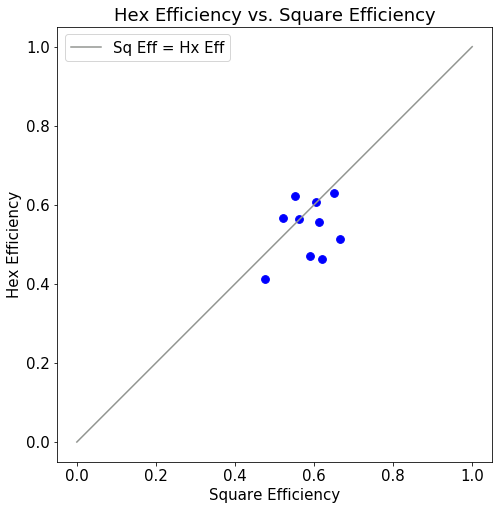

In [273]:
title = 'Hex Efficiency vs. Square Efficiency'
plot(title=title)

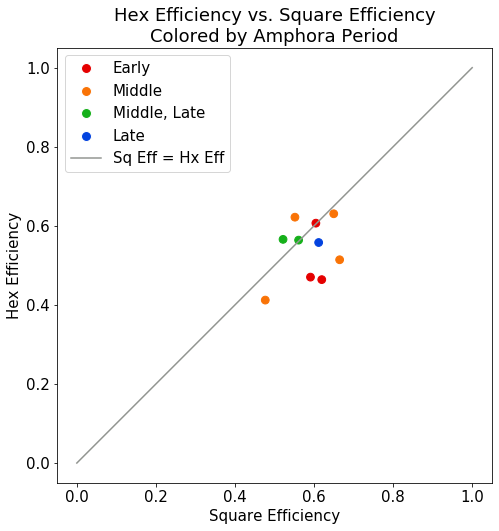

In [274]:
color_dict = {
    'Early':'xkcd:red',
    'Middle':'xkcd:orange',
    'Middle, Late':'xkcd:green',
    'Late':'xkcd:blue'
}
color_by = 'Period'
title = 'Hex Efficiency vs. Square Efficiency\nColored by Amphora Period'

plot(color_dict=color_dict, color_by=color_by, title=title)

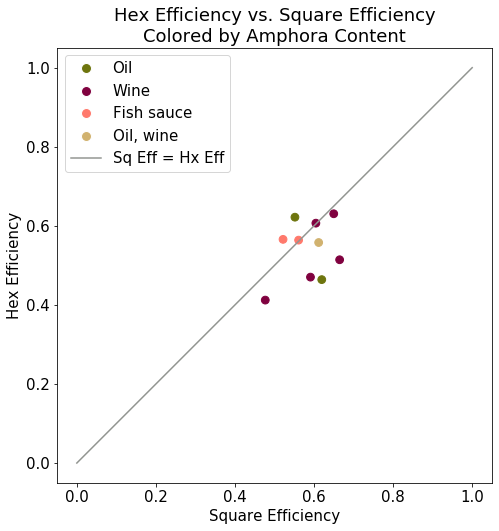

In [275]:
color_dict = {
    'Oil':'xkcd:olive',
    'Wine':'xkcd:wine',
    'Fish sauce':'xkcd:salmon',
    'Oil, wine':'xkcd:tan'
}
color_by = 'Content'
title = 'Hex Efficiency vs. Square Efficiency\nColored by Amphora Content'
plot(color_dict=color_dict, color_by=color_by, title=title)

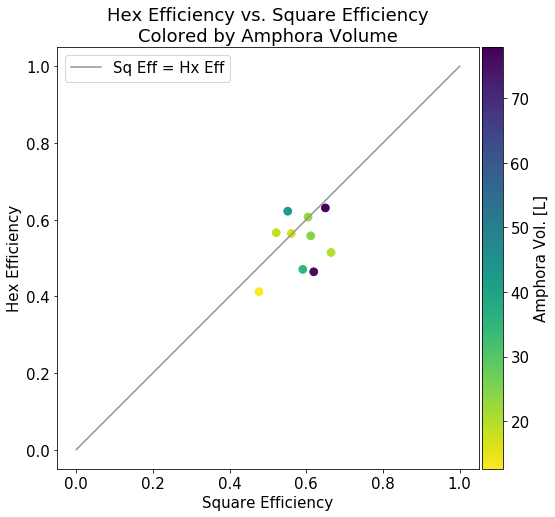

In [279]:
cmap = 'viridis_r'
color_by = 'Amphora Vol. [L]'
title = 'Hex Efficiency vs. Square Efficiency\nColored by Amphora Volume'

plot(cmap=cmap, color_by=color_by, title=title)

## Square packing compared with hexagonal packing

- Currently, there are more jars (6 out of 10) where square packing is more efficient than hexagonal packing.
- Of the 4 jars where hexagonal packing is more efficient, there are 2 jars where square and hexagonal packing are pretty much equally efficient.

In [283]:
df[df['Sq. Pack. Eff. (Auto)'] > df['Hex. Pack. Eff. (Auto)']]

,Amphora Type,Period,Region,Content,Amphora Vol. [L],Sq. Unit Width [m],Sq. Unit Height [m],Sq. Unit Volume [m^3],Sq. Pack. Eff. (Auto),Hex. Unit Side Length [m],Hex. Unit Height [m],Hex. Pack. Unit Volume [m^3],Hex. Pack. Eff. (Auto)
1,Africana 2A Grande,Middle,Central,Wine,77.900000,0.447,1.200,0.239771,0.649787,0.447,1.4280,0.741302,0.630512
5,Dressel 20,Early,West,Oil,76.151747,0.541,0.840,0.245852,0.619492,0.540,1.3000,0.984879,0.463926
6,Gauloise 4,Early,West,Wine,34.908062,0.412,0.696,0.118142,0.590952,0.412,1.0100,0.445418,0.470229
7,Kapitan 2,Middle,East,Wine,12.629000,0.259,0.790,0.052994,0.476620,0.259,1.0550,0.183867,0.412113
8,Late Roman 1,Late,East,"Oil, wine",24.359309,0.313,0.813,0.079649,0.611668,0.313,1.0295,0.262040,0.557762
9,Mid-Roman 1 (/Agora M254),Middle,Central,Wine,19.809250,0.328,0.554,0.059602,0.664723,0.328,0.8270,0.231156,0.514179


In [284]:
df[df['Sq. Pack. Eff. (Auto)'] < df['Hex. Pack. Eff. (Auto)']]

,Amphora Type,Period,Region,Content,Amphora Vol. [L],Sq. Unit Width [m],Sq. Unit Height [m],Sq. Unit Volume [m^3],Sq. Pack. Eff. (Auto),Hex. Unit Side Length [m],Hex. Unit Height [m],Hex. Pack. Unit Volume [m^3],Hex. Pack. Eff. (Auto)
0,Africana 1 Piccolo,Middle,Central,Oil,42.500000,0.29552,1.76435,0.154084,0.551646,0.29666,1.79343,0.410067,0.621850
2,Almagro 50,"Middle, Late",West,Fish sauce,18.870000,0.21400,1.58000,0.072358,0.521576,0.21400,1.68200,0.200127,0.565741
3,Almagro 51A-B,"Middle, Late",West,Fish sauce,16.581294,0.23900,1.03500,0.059120,0.560935,0.23900,1.18900,0.176453,0.563820
4,Cretoise 1,Early,East,Wine,22.775000,0.27600,0.98900,0.075338,0.604608,0.27600,1.13800,0.225223,0.606733
